<a href="https://colab.research.google.com/github/kishan-arya/MachineLearning/blob/main/CaliforniaHousing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

def load_data():
  tarball_path = Path("datasets/housing.tgz")
  if not tarball_path.is_file():
    Path("datasets").mkdir(parents=True, exist_ok=True)
    url = "https://github.com/ageron/data/raw/main/housing.tgz"
    urllib.request.urlretrieve(url, tarball_path)
    with tarfile.open(tarball_path) as housing_tarball:
      housing_tarball.extractall(path="datasets")
  return pd.read_csv(Path("datasets/housing/housing.csv"))

housing = load_data()


In [ ]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
housing["ocean_proximity"].value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


In [ ]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


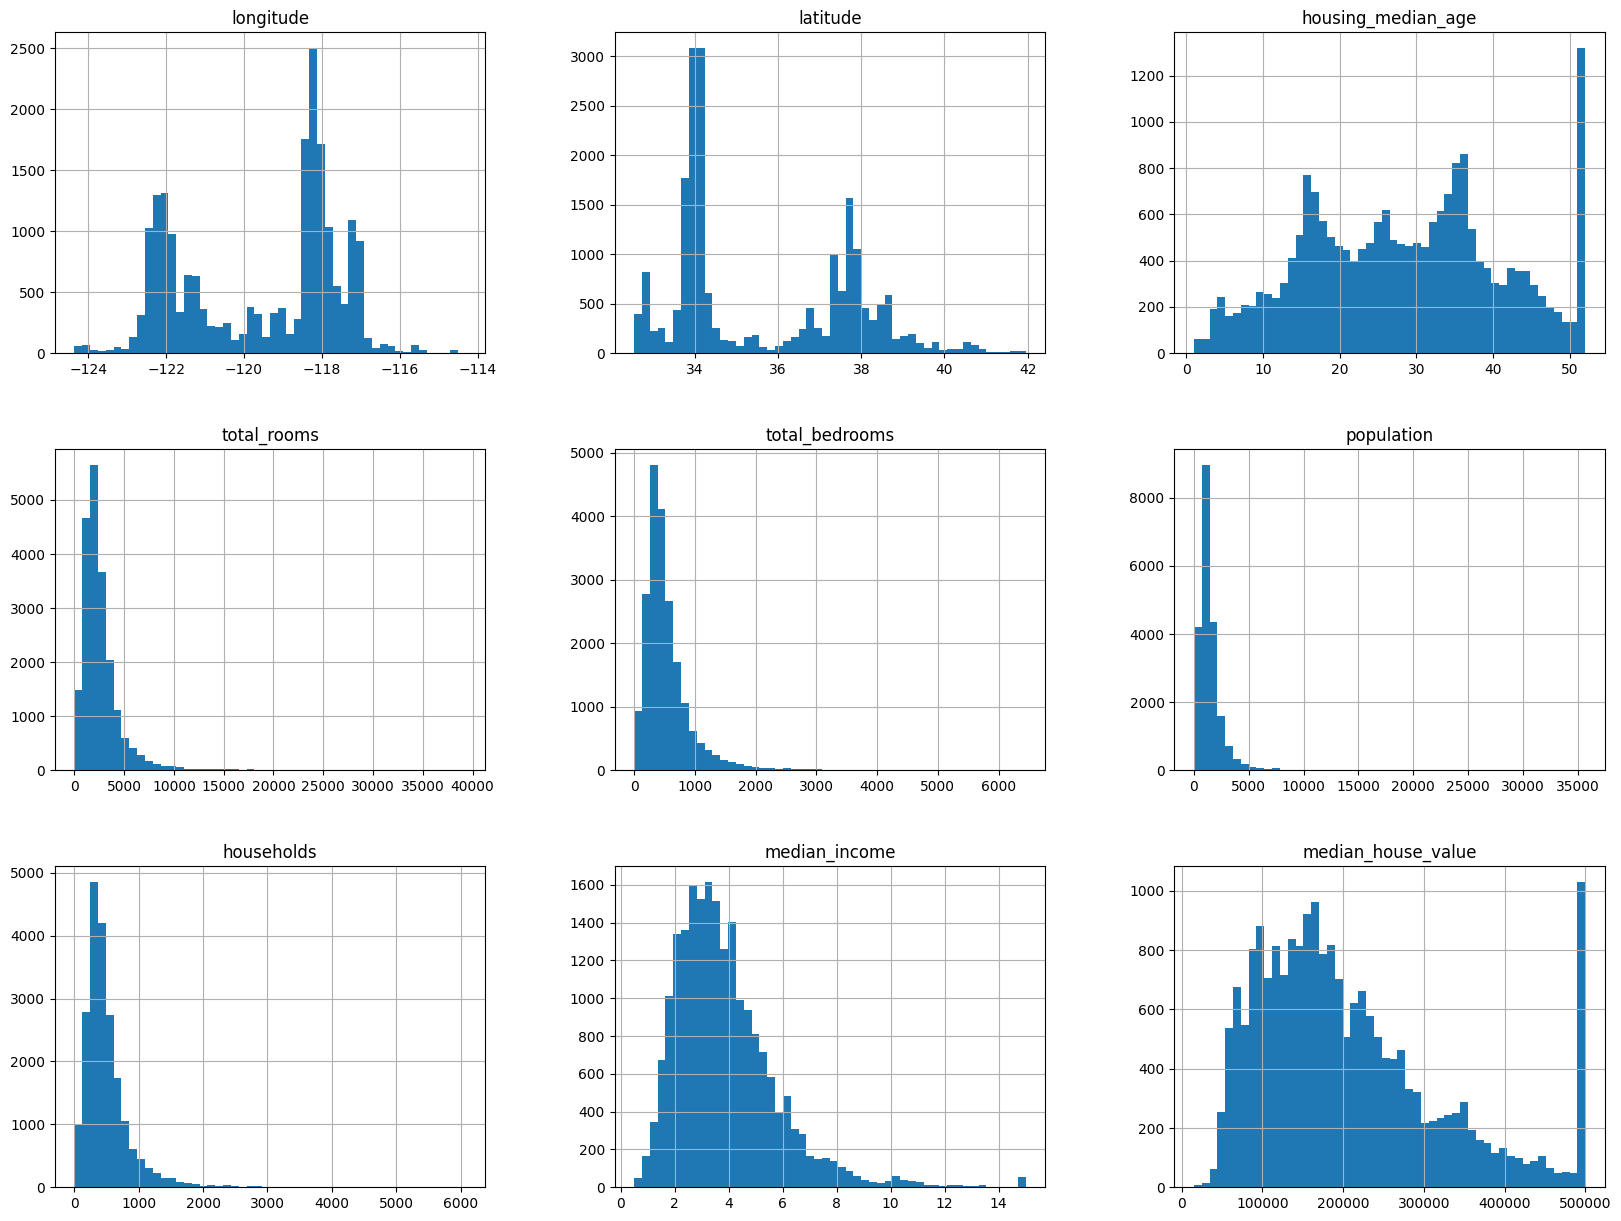

In [ ]:
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)


In [ ]:
import numpy as np
housing["income_cat"]=pd.cut(housing["median_income"],
                             bins=[0.,1.5,3.0,4.5,6.0,np.inf],
                             labels=[1,2,3,4,5])

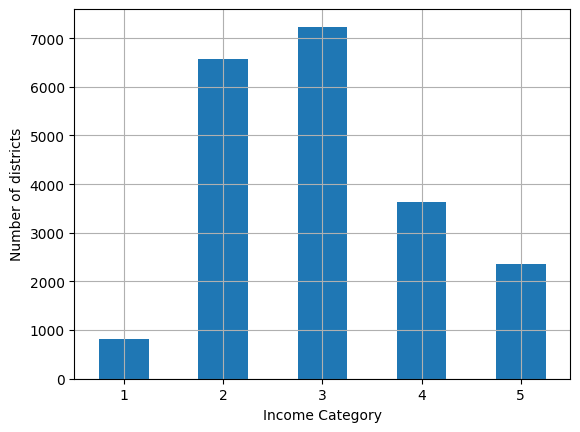

In [ ]:
housing["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Income Category")
plt.ylabel("Number of districts")
plt.show()

In [ ]:
for set_ in (train_set, test_set): # changed set to set_ as set is a keyword
    if 'income_cat' in set_.columns: # Check if column exists
        set_.drop("income_cat", axis=1, inplace=True)

In [ ]:
housing = train_set.copy()

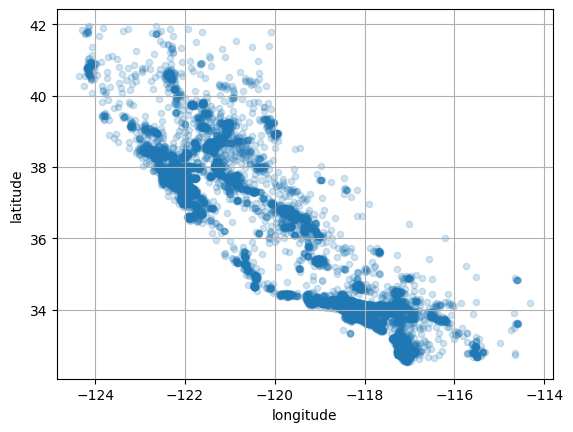

In [ ]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True, alpha=0.2)

plt.show()

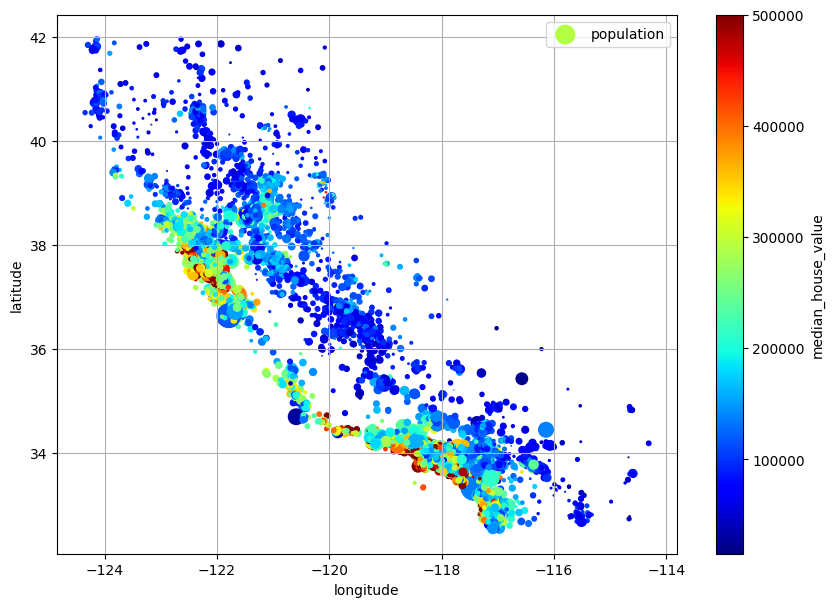

In [ ]:
housing.plot(kind="scatter",y="latitude",x="longitude",grid=True,
             s=housing["population"]/100,label="population",c="median_house_value",cmap="jet",
             colorbar=True,legend=True, sharex=False, figsize=(10,7))
plt.show()

In [ ]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.22,32.75,34.0,6001.0,1111.0,2654.0,1072.0,4.5878,291000.0,NEAR OCEAN
8267,-117.03,32.69,10.0,901.0,163.0,698.0,167.0,4.6648,156100.0,NEAR OCEAN
17445,-122.27,37.74,28.0,6909.0,1554.0,2974.0,1484.0,3.6875,353900.0,NEAR BAY
14265,-121.82,37.25,25.0,4021.0,634.0,2178.0,650.0,5.1663,241200.0,<1H OCEAN
2271,-115.98,33.32,8.0,240.0,46.0,63.0,24.0,1.4688,53800.0,INLAND


In [ ]:
# Step 2: Create a mapping dictionary
mapping = {
    '<1H OCEAN': 0,
    'INLAND': 1,
    'NEAR OCEAN': 2,
    'NEAR BAY': 3,
    'ISLAND': 4
}

# Step 3: Replace strings with integers using map()
housing["ocean_proximity"] = housing["ocean_proximity"].map(mapping)


In [ ]:
corr_matrix=housing.corr()

In [ ]:
corr_matrix["median_house_value"].sort_values(ascending=False)

,median_house_value
median_house_value,1.000000
median_income,0.687013
total_rooms,0.134060
housing_median_age,0.104714
households,0.065798
total_bedrooms,0.049993
ocean_proximity,0.019415
population,-0.025820
longitude,-0.043603
latitude,-0.146324


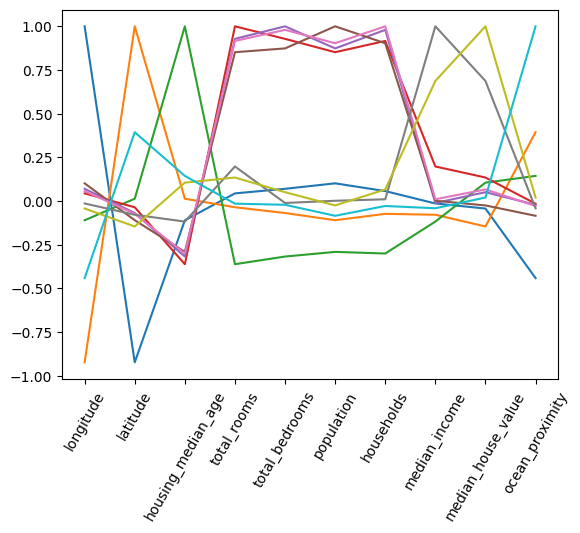

In [ ]:
plt.plot(corr_matrix)
plt.xticks(rotation=60)
plt.show()

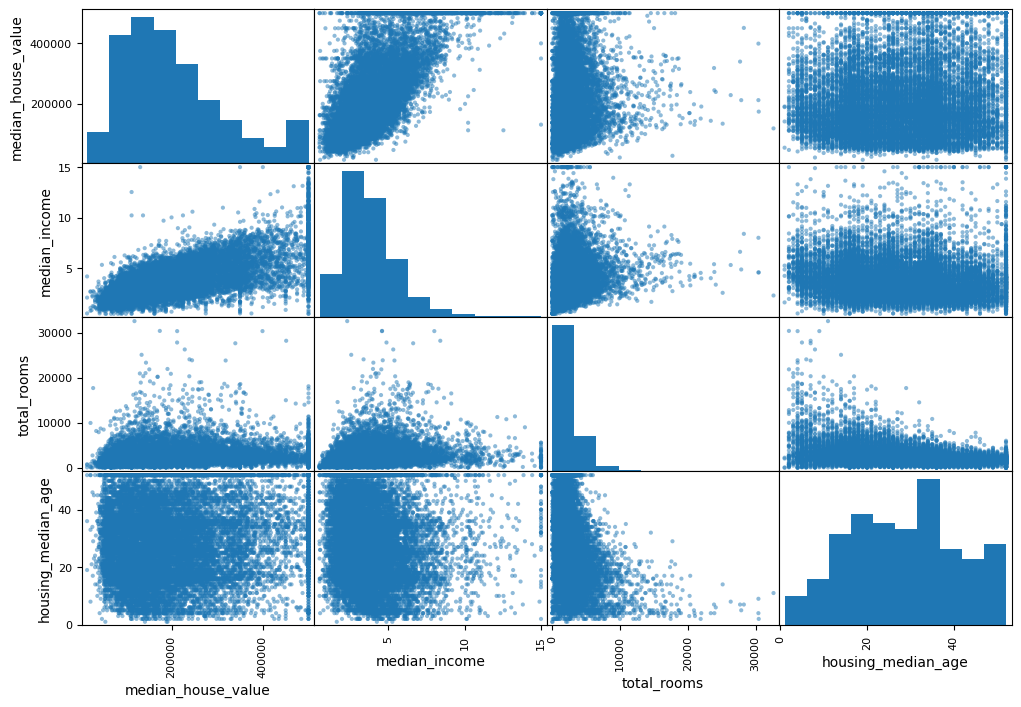

In [ ]:
from pandas.plotting import scatter_matrix
attributes=["median_house_value","median_income","total_rooms","housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12,8))
plt.show()

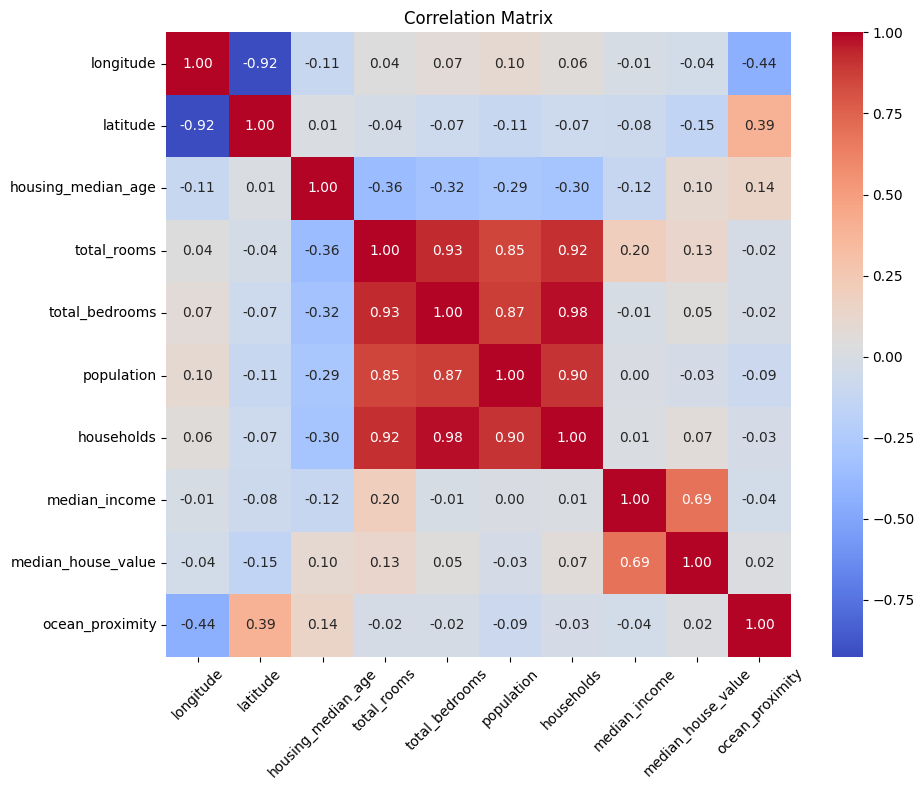

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = housing.corr(numeric_only=True)  # Use numeric columns only

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)

plt.title("Correlation Matrix")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt

corr = housing.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
plt.imshow(corr, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Correlation Matrix (imshow)")
plt.tight_layout()
plt.show()


NameError: name 'housing' is not defined

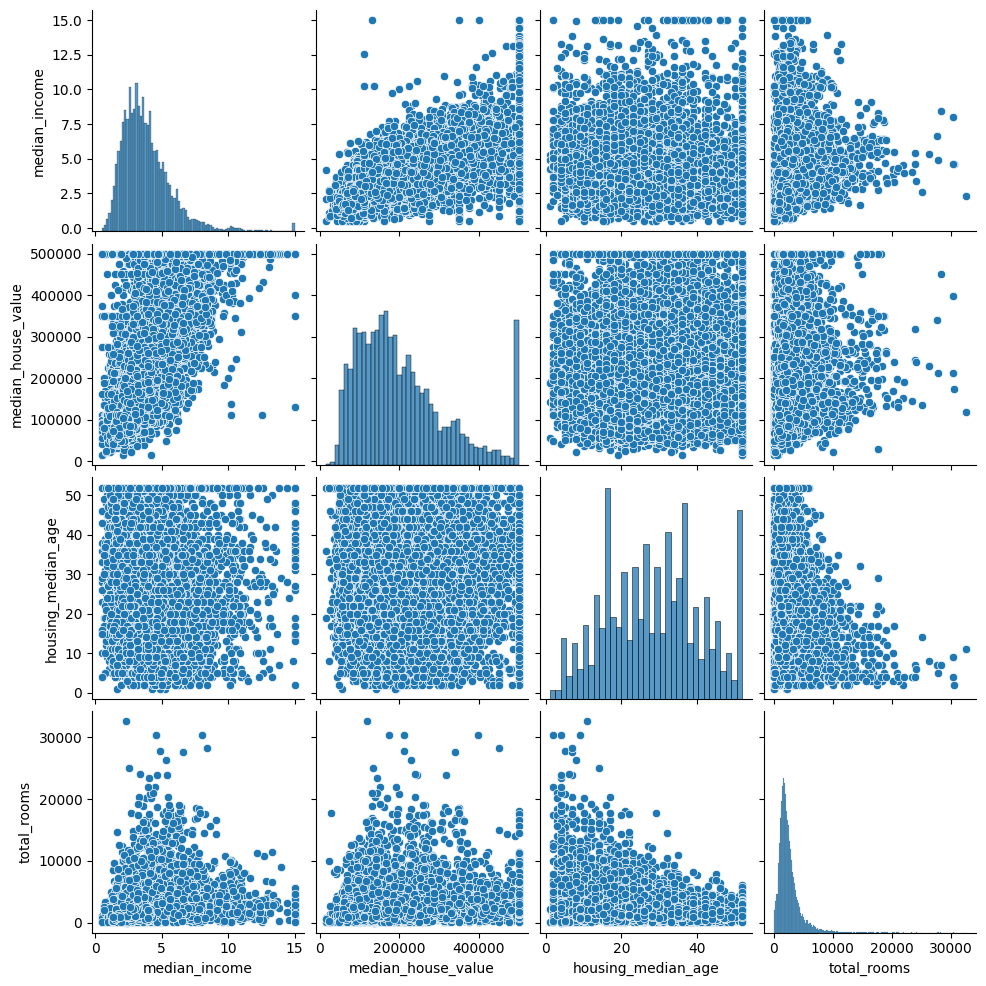

In [ ]:
import seaborn as sns

sns.pairplot(housing[["median_income", "median_house_value", "housing_median_age", "total_rooms"]])


<Axes: >

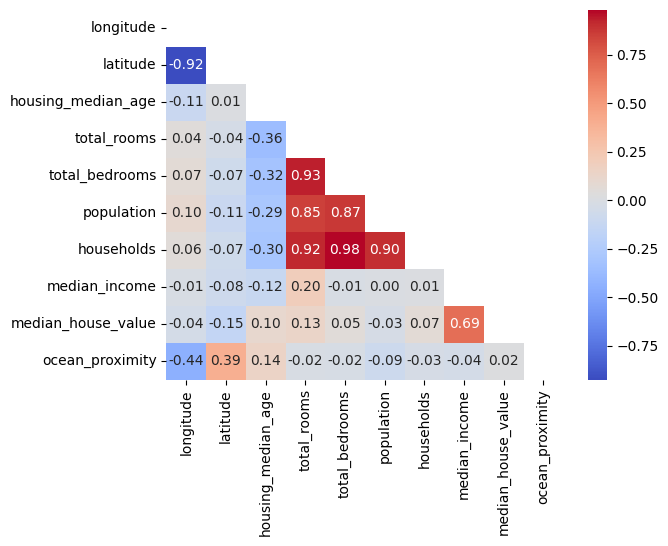

In [ ]:
import numpy as np

mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, cmap='coolwarm', annot=True, fmt=".2f")


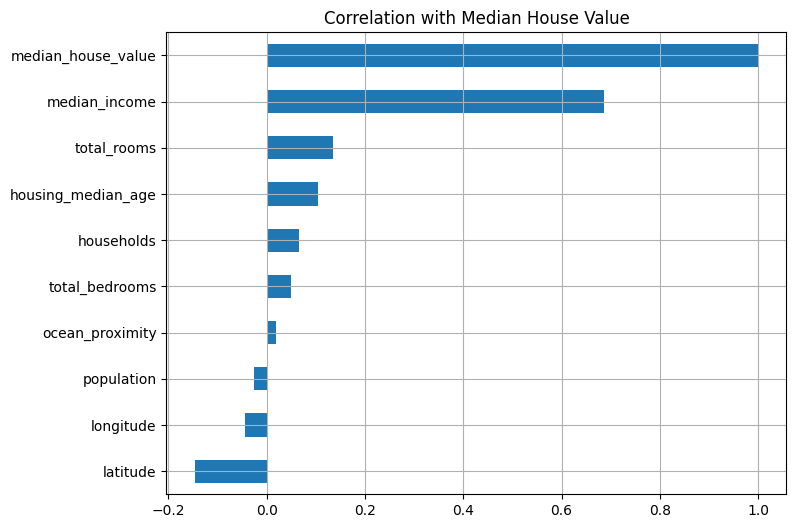

In [ ]:
target_corr = housing.corr(numeric_only=True)["median_house_value"].sort_values()
target_corr.plot(kind="barh", figsize=(8,6), title="Correlation with Median House Value")
plt.grid(True)
plt.show()


In [ ]:
import plotly.express as px

fig = px.imshow(corr, text_auto=True, color_continuous_scale='RdBu_r')
fig.update_layout(title="Correlation Matrix")
fig.show()


In [ ]:
housing = train_set.drop("median_house_value", axis=1)
housing_labels = train_set["median_house_value"].copy()

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
housing_num = housing.drop("ocean_proximity", axis=1)
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [ ]:
x=imputer.transform(housing_num)

In [ ]:
housing_tr = pd.DataFrame(x,columns=housing_num.columns,index=housing_num.index)


In [ ]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing[["ocean_proximity"]])
housing_cat_encoded[:10]

array([[4.],
       [4.],
       [3.],
       [0.],
       [1.],
       [3.],
       [1.],
       [0.],
       [1.],
       [0.]])

In [ ]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [ ]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing[["ocean_proximity"]])
housing_cat_1hot

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 16512 stored elements and shape (16512, 5)>

In [ ]:
housing_cat_1hot.toarray()

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [ ]:
cat_encoder.feature_names_in_

array(['ocean_proximity'], dtype=object)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
housing_num_scaled = scaler.fit_transform(housing_num)

<Axes: >

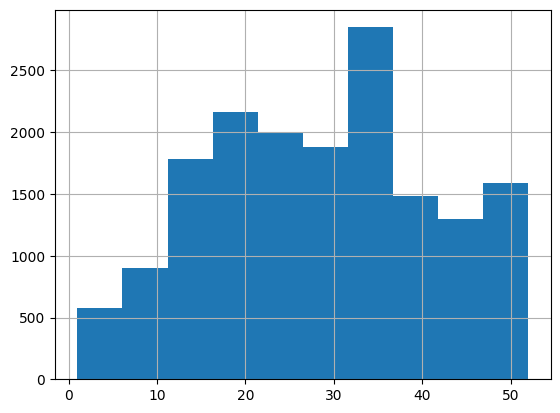

In [ ]:
housing["housing_median_age"].hist()


In [ ]:
from sklearn.metrics.pairwise import rbf_kernel
age_simil_35 = rbf_kernel(housing[["housing_median_age"]],[[35]],gamma=0.1)

In [ ]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
14196,-117.22,32.75,34.0,6001.0,1111.0,2654.0,1072.0,4.5878,NEAR OCEAN
8267,-117.03,32.69,10.0,901.0,163.0,698.0,167.0,4.6648,NEAR OCEAN
17445,-122.27,37.74,28.0,6909.0,1554.0,2974.0,1484.0,3.6875,NEAR BAY
14265,-121.82,37.25,25.0,4021.0,634.0,2178.0,650.0,5.1663,<1H OCEAN
2271,-115.98,33.32,8.0,240.0,46.0,63.0,24.0,1.4688,INLAND


In [ ]:
from sklearn.linear_model import LinearRegression
target_scaler = StandardScaler()
scaled_labels = target_scaler.fit_transform(housing_labels.to_frame())
model = LinearRegression()
model.fit(housing[["median_income"]],scaled_labels)
some_new_data=housing[["median_income"]].iloc[:5] #pretend this is new data

scaled_predictions = model.predict(some_new_data)
predictions = target_scaler.inverse_transform(scaled_predictions)


or


In [ ]:
from sklearn.compose import TransformedTargetRegressor
model = TransformedTargetRegressor(LinearRegression(),transformer=StandardScaler())
model.fit(housing[["median_income"]],housing_labels)
predictions = model.predict(some_new_data)

custom transformation


In [ ]:
from sklearn.preprocessing import FunctionTransformer
log_transformer = FunctionTransformer(np.log,inverse_func=np.exp)
log_pop = log_transformer.transform(housing[["population"]])

In [ ]:
ratio_transformation = FunctionTransformer(lambda x: x[:,[0]]/x[:,[1]])
ratio_transformation.transform(np.array([[1.,2.],[3.,4.]]))

array([[0.5 ],
       [0.75]])

building transformer from scrach

In [ ]:
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted
class StandardScalerClone(BaseEstimator, TransformerMixin):
  def __init__(self, with_mean=True):
    self.with_mean = with_mean

  def fit(self,x,y=None):
    x=check_array(x)
    self.mean_=x.mean(axis=0)
    self.scale_=x.std(axis=0)
    self.n_features_in_= x.shape[1]
    return self

  def transform(self, x):
    check_is_fitted(self)
    x = check_array(x)
    assert self.n_features_in_ == x.shape[1]
    if self.with_mean:
      x = x - self.mean_
    return x/self.scale_


In [ ]:
from sklearn.cluster import KMeans

class ClusterSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state

    def fit(self, X, y=None, sample_weight=None):
        self.kmeans_ = KMeans(self.n_clusters, n_init=10,
                              random_state=self.random_state)
        self.kmeans_.fit(X, sample_weight=sample_weight)
        return self  # always return self!

    def transform(self, X):
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)

    def get_feature_names_out(self, names=None):
        return [f"Cluster {i} similarity" for i in range(self.n_clusters)]

In [ ]:
cluster_simil = ClusterSimilarity(n_clusters=10,gamma=1.,random_state=42)
similarities=cluster_simil.fit_transform(housing[["latitude","longitude"]],
                                         sample_weight=housing_labels)

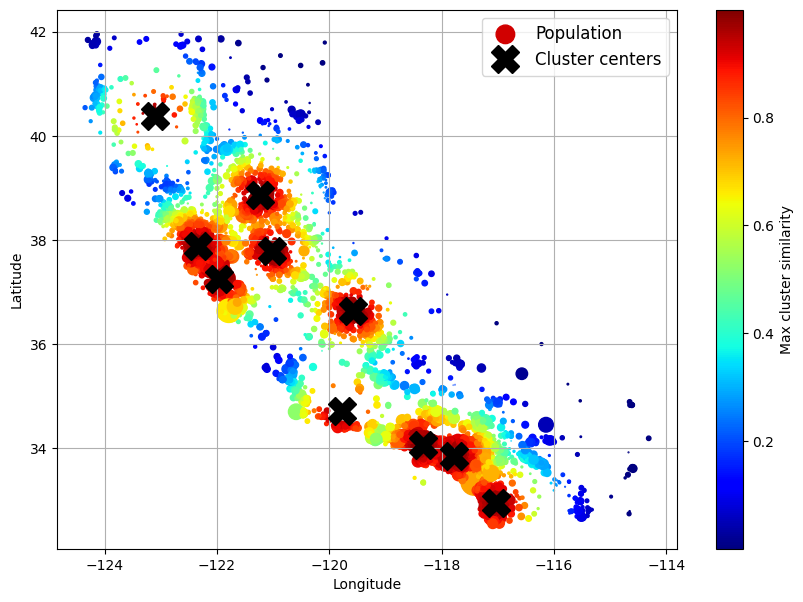

In [ ]:
housing_renamed = housing.rename(columns={
    "latitude": "Latitude", "longitude": "Longitude",
    "population": "Population",
    "median_house_value": "Median house value (ᴜsᴅ)"})
housing_renamed["Max cluster similarity"] = similarities.max(axis=1)

housing_renamed.plot(kind="scatter", x="Longitude", y="Latitude", grid=True,
                     s=housing_renamed["Population"] / 100, label="Population",
                     c="Max cluster similarity",
                     cmap="jet", colorbar=True,
                     legend=True, sharex=False, figsize=(10, 7))
plt.plot(cluster_simil.kmeans_.cluster_centers_[:, 1],
         cluster_simil.kmeans_.cluster_centers_[:, 0],
         linestyle="", color="black", marker="X", markersize=20,
         label="Cluster centers")
plt.legend(loc="upper right",fontsize="large")

plt.show()

In [ ]:
import sklearn
sklearn.set_config(display="diagram")


In [ ]:
from sklearn.pipeline import Pipeline
num_pipeline = Pipeline([
    ("impute",SimpleImputer(strategy="median")),
    ("standardize",StandardScaler()),
])

In [ ]:
from sklearn.pipeline import make_pipeline
num_pipeline = make_pipeline(SimpleImputer(strategy="median"),StandardScaler())

In [ ]:
from sklearn.compose import ColumnTransformer
num_attribs = ["longitude","latitude","housing_median_age","total_rooms","total_bedrooms","population","households","median_income"]
cat_attribs=["ocean_proximity"]
cat_pipeline = make_pipeline(SimpleImputer(strategy="most_frequent"),OneHotEncoder(handle_unknown = "ignore"))

preprocessing = ColumnTransformer([
    ("num",num_pipeline,num_attribs),
    ("cat",cat_pipeline,cat_attribs),
])

In [ ]:
from sklearn.compose import make_column_selector, make_column_transformer

preprocessing = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)),
    (cat_pipeline, make_column_selector(dtype_include=object)),
)
housing_prepared = preprocessing.fit_transform(housing)

In [ ]:
housing_prepared.shape

(16512, 13)

In [ ]:
preprocessing.get_feature_names_out()

array(['pipeline-1__longitude', 'pipeline-1__latitude',
       'pipeline-1__housing_median_age', 'pipeline-1__total_rooms',
       'pipeline-1__total_bedrooms', 'pipeline-1__population',
       'pipeline-1__households', 'pipeline-1__median_income',
       'pipeline-2__ocean_proximity_<1H OCEAN',
       'pipeline-2__ocean_proximity_INLAND',
       'pipeline-2__ocean_proximity_ISLAND',
       'pipeline-2__ocean_proximity_NEAR BAY',
       'pipeline-2__ocean_proximity_NEAR OCEAN'], dtype=object)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lin_reg = make_pipeline(preprocessing,LinearRegression())
lin_reg.fit(housing,housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7eb2f27b19d0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7eb2f492a8d0>)])),
                ('linearregression', LinearRegression())])

In [ ]:
housing_prediction = lin_reg.predict(housing)
housing_prediction[:5].round(-2)

array([288000., 227300., 291900., 265800.,  21800.])

In [ ]:
housing_labels.iloc[:5].values

array([291000., 156100., 353900., 241200.,  53800.])

In [ ]:
from sklearn.metrics import mean_squared_error

# Calculate MSE
lin_mse = mean_squared_error(housing_labels, housing_prediction)

# Calculate RMSE manually
lin_rmse = np.sqrt(lin_mse)

lin_rmse

np.float64(68458.0127473328)

In [ ]:
def column_ratio(X):
    return X[:, [0]] / X[:, [1]]

def ratio_name(function_transformer, feature_names_in):
    return ["ratio"]  # feature names out

def ratio_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="median"),
        FunctionTransformer(column_ratio, feature_names_out=ratio_name),
        StandardScaler())

log_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(np.log, feature_names_out="one-to-one"),
    StandardScaler())
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)
default_num_pipeline = make_pipeline(SimpleImputer(strategy="median"),
                                     StandardScaler())
preprocessing = ColumnTransformer([
        ("bedrooms", ratio_pipeline(), ["total_bedrooms", "total_rooms"]),
        ("rooms_per_house", ratio_pipeline(), ["total_rooms", "households"]),
        ("people_per_house", ratio_pipeline(), ["population", "households"]),
        ("log", log_pipeline, ["total_bedrooms", "total_rooms", "population",
                               "households", "median_income"]),
        ("geo", cluster_simil, ["latitude", "longitude"]),
        ("cat", cat_pipeline, make_column_selector(dtype_include=object)),
    ],
    remainder=default_num_pipeline)  # one column remaining: housing_median_age

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = make_pipeline(preprocessing,DecisionTreeRegressor(random_state=42))
tree_reg.fit(housing,housing_labels)
housing_predictions = tree_reg.predict(housing)
tree_rmse = mean_squared_error(housing_labels,housing_predictions)
tree_rmse = np.sqrt(tree_rmse)
tree_rmse

np.float64(0.0)

In [ ]:
from sklearn.model_selection import cross_val_score
tree_rmses = -cross_val_score(tree_reg,housing,housing_labels,scoring="neg_root_mean_squared_error",cv =10)
pd.Series(tree_rmses).describe()

,0
count,10.000000
mean,65885.969159
std,1978.523862
min,62467.704755
25%,64356.035929
50%,66408.426307
75%,67617.232424
max,67706.608347


In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = make_pipeline(preprocessing,RandomForestRegressor(random_state=42))
forest_rmses = -cross_val_score(forest_reg,housing,housing_labels,scoring="neg_root_mean_squared_error",cv =10)
pd.Series(forest_rmses).describe()

,0
count,10.000000
mean,46629.768181
std,1030.208068
min,44911.114228
25%,46136.371517
50%,46499.156908
75%,47256.931024
max,48149.214837


In [ ]:
from sklearn.model_selection import GridSearchCV

full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("random_forest", RandomForestRegressor(random_state=42)),
])
param_grid = [
    {'preprocessing__geo__n_clusters': [5, 8, 10],
     'random_forest__max_features': [4, 6, 8]},
    {'preprocessing__geo__n_clusters': [10, 15],
     'random_forest__max_features': [6, 8, 10]},
]
grid_search = GridSearchCV(full_pipeline, param_grid, cv=3,
                           scoring='neg_root_mean_squared_error')
grid_search.fit(housing, housing_labels)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                     SimpleImputer(strategy='median')),
                                                                                    ('standardscaler',
                                                                                     StandardScaler())]),
                                                          transformers=[('bedrooms',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('functiontransformer',
                                                                                          FunctionTransformer(feature_names_out=<f...
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7eb2f2875d10>)])),
                                       ('random_forest',
                                        RandomForestRegressor(random_state=42))]),
             param_grid=[{'preprocessing__geo__n_clusters': [5, 8, 10],
                          'random_forest__max_features': [4, 6, 8]},
                         {'preprocessing__geo__n_clusters': [10, 15],
                          'random_forest__max_features': [6, 8, 10]}],
             scoring='neg_root_mean_squared_error')

In [ ]:
grid_search.best_params_

{'preprocessing__geo__n_clusters': 15, 'random_forest__max_features': 6}

In [ ]:
grid_search.best_estimator_

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x7eb2f28...
                                                  ClusterSimilarity(n_clusters=15,
                                                                    random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7eb2f28657d0>)])),
                ('random_forest',
                 RandomForestRegressor(max_features=6, random_state=42))])

In [ ]:
cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)

# extra code – these few lines of code just make the DataFrame look nicer
cv_res = cv_res[["param_preprocessing__geo__n_clusters",
                 "param_random_forest__max_features", "split0_test_score",
                 "split1_test_score", "split2_test_score", "mean_test_score"]]
score_cols = ["split0", "split1", "split2", "mean_test_rmse"]
cv_res.columns = ["n_clusters", "max_features"] + score_cols
cv_res[score_cols] = -cv_res[score_cols].round().astype(np.int64)

cv_res.head()

,n_clusters,max_features,split0,split1,split2,mean_test_rmse
12,15,6,43015,44023,43880,43639
13,15,8,43754,44042,44124,43973
6,10,4,43932,44704,44354,44330
9,10,6,43971,44992,44575,44512
7,10,6,43971,44992,44575,44512


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {'preprocessing__geo__n_clusters': randint(low=3, high=50),
                  'random_forest__max_features': randint(low=2, high=20)}

rnd_search = RandomizedSearchCV(
    full_pipeline, param_distributions=param_distribs, n_iter=10, cv=3,
    scoring='neg_root_mean_squared_error', random_state=42)

rnd_search.fit(housing, housing_labels)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                           SimpleImputer(strategy='median')),
                                                                                          ('standardscaler',
                                                                                           StandardScaler())]),
                                                                transformers=[('bedrooms',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('functiontransformer',
                                                                                                FunctionTransformer(feature_names_...
                                             ('random_forest',
                                              RandomForestRegressor(random_state=42))]),
                   param_distributions={'preprocessing__geo__n_clusters': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7eb2f2821f50>,
                                        'random_forest__max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7eb2f289f250>},
                   random_state=42, scoring='neg_root_mean_squared_error')

In [ ]:
rnd_search.best_params_

{'preprocessing__geo__n_clusters': 45, 'random_forest__max_features': 9}

In [ ]:
final_model = rnd_search.best_estimator_

In [ ]:
feature_importance = final_model["random_forest"].feature_importances_

In [ ]:
sorted(zip(feature_importance,final_model["preprocessing"].get_feature_names_out()),reverse=True)

[(np.float64(0.18230279007299027), 'log__median_income'),
 (np.float64(0.06949515325320092), 'cat__ocean_proximity_INLAND'),
 (np.float64(0.06942528034566388), 'bedrooms__ratio'),
 (np.float64(0.05755006233217791), 'rooms_per_house__ratio'),
 (np.float64(0.04758221887992159), 'people_per_house__ratio'),
 (np.float64(0.044511859246479754), 'geo__Cluster 32 similarity'),
 (np.float64(0.026572253192884074), 'geo__Cluster 29 similarity'),
 (np.float64(0.02310935558213975), 'geo__Cluster 11 similarity'),
 (np.float64(0.02265448223163772), 'geo__Cluster 17 similarity'),
 (np.float64(0.018058101954159654), 'geo__Cluster 7 similarity'),
 (np.float64(0.018047466903567958), 'geo__Cluster 14 similarity'),
 (np.float64(0.01735898187107166), 'geo__Cluster 34 similarity'),
 (np.float64(0.015037617517181108), 'geo__Cluster 40 similarity'),
 (np.float64(0.014845664740180304), 'geo__Cluster 4 similarity'),
 (np.float64(0.013889852422028894), 'geo__Cluster 36 similarity'),
 (np.float64(0.013831102919822

In [ ]:
x_test = test_set.drop("median_house_value",axis=1)
y_test = test_set["median_house_value"].copy() # Changed from () to [] for column access
final_predictions = final_model.predict(x_test)
final_rmse = np.sqrt(mean_squared_error(y_test,final_predictions))
final_rmse


np.float64(42121.65737109745)

In [ ]:
from scipy import stats

def rmse(squared_errors):
    return np.sqrt(np.mean(squared_errors))

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
boot_result = stats.bootstrap([squared_errors], rmse,
                              confidence_level=confidence, random_state=42)
rmse_lower, rmse_upper = boot_result.confidence_interval
rmse_lower, rmse_upper

(np.float64(40050.74191136242), np.float64(44558.93093791382))

In [ ]:
import joblib

In [ ]:
joblib.dump(final_model,"my_california_housing_model.pkl")

['my_california_housing_model.pkl']

In [ ]:
import joblib

# extra code – excluded for conciseness
from sklearn.cluster import KMeans
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics.pairwise import rbf_kernel

def column_ratio(X):
    return X[:, [0]] / X[:, [1]]

#class ClusterSimilarity(BaseEstimator, TransformerMixin):
#    [...]

final_model_reloaded = joblib.load("my_california_housing_model.pkl")

new_data = housing.iloc[:5]  # pretend these are new districts
predictions = final_model_reloaded.predict(new_data)

In [ ]:
predictions

array([271852., 151762., 308196., 242896.,  67067.])